In [5]:
import numpy as np
import pandas as pd

data visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [7]:
from scipy import stats

**Bartlett's sphericity test**

In [8]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Testing and training data

In [10]:
from sklearn.model_selection import train_test_split


Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression


OLS

In [12]:
import statsmodels.api as sm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [13]:
weights = [' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk']

In [14]:
outputs = ['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1']

In [15]:
sheets=pd.read_excel('stock portfolio performance data set.xlsx',sheet_name=['all period'],skiprows=[0],usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df.keys()
df.describe()


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


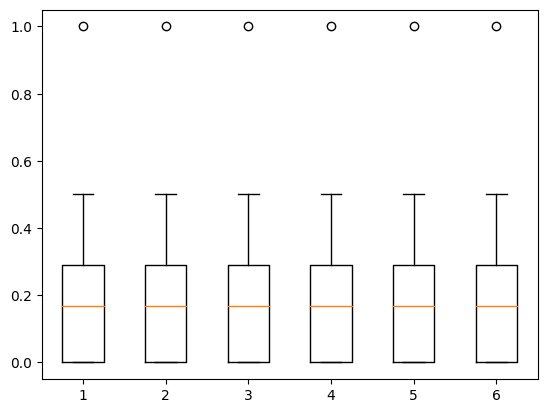

In [ ]:
plt.boxplot(df.iloc[:,:6])
plt.show()

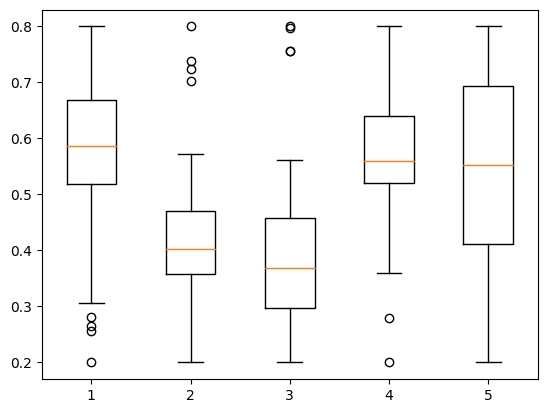

In [ ]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [ ]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [ ]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(57, 12)

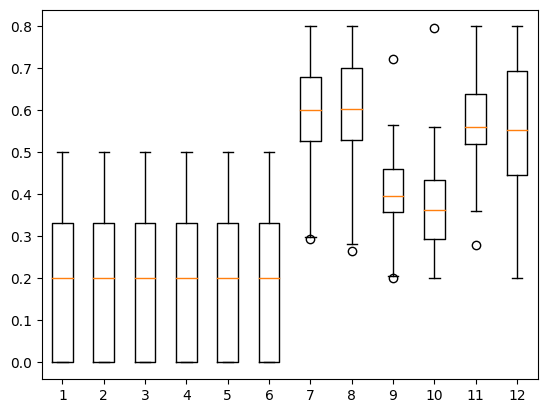

In [ ]:
plt.boxplot(df_clean)
plt.show()

**Method 2** : IQR

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape


(54, 12)

After removal of outlyers

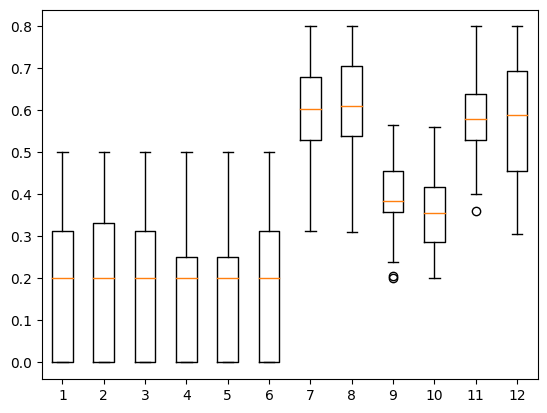

In [ ]:
plt.boxplot(df_clean)
plt.show()

In [ ]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,7:].copy()

comparision of dataset before and after removing influential points

In [ ]:
df.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [ ]:
df_clean.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.166611,0.175870,0.166611,0.160444,0.160444,0.169704,0.605162,0.607403,0.395090,0.363814,0.586667,0.575817
std,0.166131,0.170545,0.166131,0.166019,0.166019,0.170777,0.107530,0.105584,0.082555,0.095015,0.092594,0.141535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.312245,0.310363,0.200000,0.200000,0.360000,0.305882
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.528696,0.540347,0.357166,0.287020,0.530000,0.455882
50%,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.603017,0.610499,0.385245,0.355481,0.580000,0.588235
75%,0.312250,0.333000,0.312250,0.250000,0.250000,0.312250,0.680619,0.705218,0.456205,0.417731,0.640000,0.694118
max,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.800000,0.800000,0.565098,0.561711,0.800000,0.800000


Corelation matrix

In [ ]:
corr_matrix = df_clean.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
Large B/P,1.000000,-0.217003,-0.336726,-0.127976,-0.127976,-0.179812,0.130620,0.199857,-0.154602,0.156899,0.458638,-0.176338
Large ROE,-0.217003,1.000000,-0.217003,-0.178123,-0.178123,-0.230127,0.457428,0.425838,-0.164282,-0.310321,0.266812,0.730356
Large S/P,-0.336726,-0.217003,1.000000,-0.127976,-0.127976,-0.179812,0.357538,0.265229,0.425393,0.488787,-0.097978,-0.021082
Large Return Rate in the last quarter,-0.127976,-0.178123,-0.127976,1.000000,-0.338537,-0.216121,-0.066782,-0.129164,0.335989,0.293347,-0.149399,-0.284156
Large Market Value,-0.127976,-0.178123,-0.127976,-0.338537,1.000000,-0.216121,-0.486575,-0.520145,-0.057710,-0.525454,-0.039719,0.098297
Small systematic Risk,-0.179812,-0.230127,-0.179812,-0.216121,-0.216121,1.000000,-0.393500,-0.246145,-0.370356,-0.092941,-0.433053,-0.355863
Annual Return.1,0.130620,0.457428,0.357538,-0.066782,-0.486575,-0.393500,1.000000,0.969784,-0.034299,0.209489,0.578237,0.494442
Excess Return.1,0.199857,0.425838,0.265229,-0.129164,-0.520145,-0.246145,0.969784,1.000000,-0.253554,0.092481,0.620879,0.465851
Systematic Risk.1,-0.154602,-0.164282,0.425393,0.335989,-0.057710,-0.370356,-0.034299,-0.253554,1.000000,0.772091,-0.349636,-0.222331
Total Risk.1,0.156899,-0.310321,0.488787,0.293347,-0.525454,-0.092941,0.209489,0.092481,0.772091,1.000000,-0.206480,-0.408931


using seaborn

<Axes: >

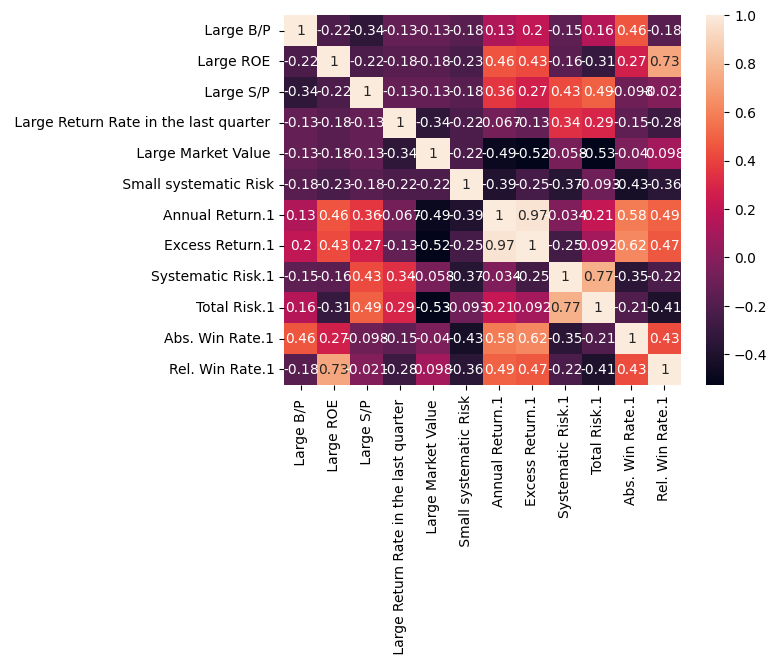

In [ ]:
sns.heatmap(corr_matrix, annot=True)

using matlplotlib

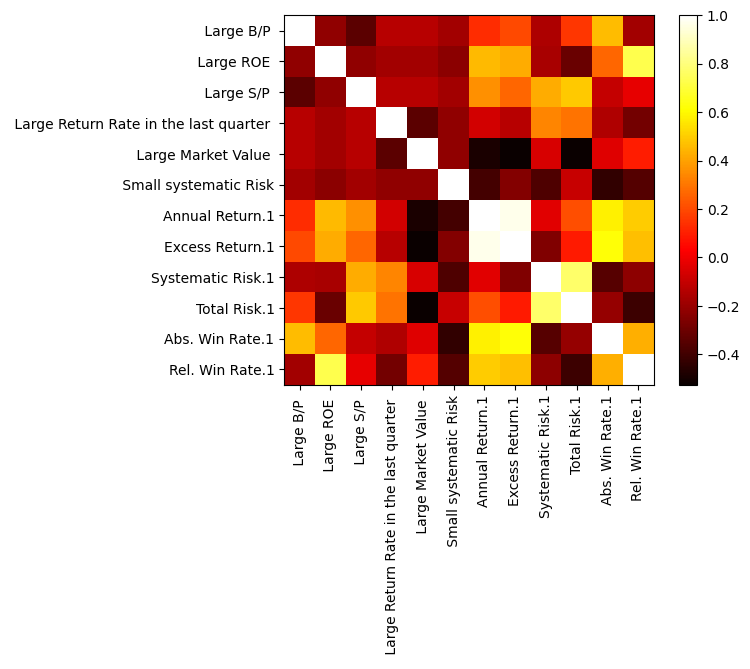

In [ ]:
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

Bartlett's sphericity test

In [ ]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(corr_matrix)

# Print the test results
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Chi-square value: 491.97596784060147
P-value: 2.0800468556717675e-66


p<0.5 : do PCA 

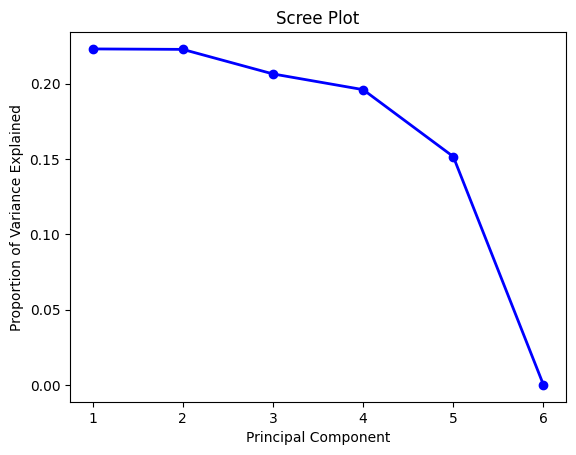

In [ ]:
data_standardized = (weight_df - np.mean(weight_df, axis=0)) / np.std(weight_df, axis=0)

# Fit PCA model and transform the data
pca = PCA()
pca.fit(data_standardized)
pca_data = pca.transform(data_standardized)

# Generate scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
# standardize the data
X = StandardScaler().fit_transform(df_clean)

# perform PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X)

# create a new DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

# print the explained variance ratio of each principal component
print(pca.explained_variance_ratio_ * 100)


[30.3403798  23.14289154 13.96807298 12.04111066 10.12551469]


In [ ]:
(pca.explained_variance_ratio_ * 100).sum()


89.61796967723996

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-4.275458,0.020320,1.497309,0.600803,0.321384
1,-2.487187,1.709982,-2.365459,-0.983730,-0.598254
2,0.779912,1.751927,2.610240,1.732090,1.599185
3,-0.435013,1.770051,-1.648966,0.245225,3.329803
4,0.488774,4.227838,-0.993199,0.450721,0.407613
5,0.912361,-0.689179,0.766906,3.192204,-0.982740
6,0.486687,-3.114640,-2.947699,0.971678,0.812607
7,0.902788,0.227116,-1.906716,1.655672,-2.292513
8,2.288151,-0.691098,3.178557,-0.503684,-0.740117
9,-0.666733,-1.218955,-0.477022,-2.553713,0.695028


test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, outputs_df, test_size=0.2, random_state=22)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# evaluate the model on the testing data
score = reg.score(X_test, y_test)

# print the R^2 score
print('R^2 score:', score)


R^2 score: 0.8863590035239483


Test of assumptions

1.Hermoscadersity

f